<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#notebook_protocole-:-Introduction" data-toc-modified-id="notebook_protocole-:-Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>notebook_protocole : Introduction</a></span></li><li><span><a href="#Projet-étape-par-étape" data-toc-modified-id="Projet-étape-par-étape-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Projet étape par étape</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Import-the-libraries" data-toc-modified-id="Import-the-libraries-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Import the libraries</a></span></li><li><span><a href="#Import-data" data-toc-modified-id="Import-data-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Import data</a></span></li><li><span><a href="#EDA-rapide" data-toc-modified-id="EDA-rapide-2.0.3"><span class="toc-item-num">2.0.3&nbsp;&nbsp;</span>EDA rapide</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-2.0.4"><span class="toc-item-num">2.0.4&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-2.0.5"><span class="toc-item-num">2.0.5&nbsp;&nbsp;</span>Modeling</a></span></li><li><span><a href="#NEW-!-Amélioration-du-modèle-(Tuning)" data-toc-modified-id="NEW-!-Amélioration-du-modèle-(Tuning)-2.0.6"><span class="toc-item-num">2.0.6&nbsp;&nbsp;</span>NEW ! Amélioration du modèle (Tuning)</a></span></li><li><span><a href="#After-GridSearchCV,-I-put-new-model-with-best-hyperparameters" data-toc-modified-id="After-GridSearchCV,-I-put-new-model-with-best-hyperparameters-2.0.7"><span class="toc-item-num">2.0.7&nbsp;&nbsp;</span>After GridSearchCV, I put new model with best hyperparameters</a></span></li></ul></li><li><span><a href="#Implementation-of-unit-tests-exemple" data-toc-modified-id="Implementation-of-unit-tests-exemple-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Implementation of unit tests exemple</a></span></li></ul></li></ul></div>

# notebook_protocole : Introduction

Dans le cadre d'un projet Simplon, nous avons travaillé avec mon collègue simplonien Jonathan sur la confection d'un modèle de prédiction pour savoir si une banque risque de faire faillite ou non.  

Pour cela, nous avons à notre disposition une base de donnée comportant des indicateurs définis par les règlementations commerciales de la Bourse.  

Mon but ici est de représenter le même modèle mais en lui apportant une amélioration pour remplir les compétences requises pour le E2 (Présenter un modèle amélioré et vérifier qu'il passe les tests unitaires)  

# Projet étape par étape

### Import the libraries

In [1]:
# Basic imports
import pickle
import pandas as pd
import numpy as np

#viz
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
# Scikit learn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , RobustScaler, MinMaxScaler
#class ACP
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn import decomposition
from sklearn import preprocessing

# Preprocessing & Model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
from sklearn.svm import SVC

#pipeline
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipeline

#imblearn library and SMOTE
import imblearn
from imblearn.over_sampling import SMOTE

#report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve,auc,\
    confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

### Import data

In [2]:
df = pd.read_csv('data/data.csv')
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


### EDA rapide

In [3]:
#replace the column's names
df.columns = [c.replace(" ","", 1) if c.startswith(' ') else c for c in df.columns]

#drop target and categorial's columns
model = df.drop(df[['Bankrupt?', 'Cash flow rate', 'Net Income Flag']],axis =1)

In [4]:
# Splitting between column with max value <= 1 and max value > 1
# Create 2 lists to store columns name/values
max_1 = []
max_above_1 = []

#Looping through the dataset, populating lists above
for column in model:
    if model[column].max() <= 1:
        max_1.append(model[column])
    else:
        max_above_1.append(model[column])
    

model_2 = pd.DataFrame(max_1).T
model_3 = pd.DataFrame(max_above_1).T

### Preprocessing

In [5]:
#use StandardScaler() columns in model_2
sc = StandardScaler()
model = sc.fit_transform(model_2.iloc[:,1:])
df_sc = pd.DataFrame(model,columns= model_2.iloc[:,1:].columns)

df_sc[['Bankrupt?','Cash flow rate', 'Net Income Flag']] = df[['Bankrupt?', 'Cash flow rate', 'Net Income Flag']]

In [6]:
#use MinMaxScaler() columns in model_3
minmax = MinMaxScaler()
model = minmax.fit_transform(model_3.iloc[:,1:])
df_minmax = pd.DataFrame(df,columns= model_3.iloc[:,1:].columns)
#take target in df because the targets remove to df_30 (targets <= 1)
df_minmax['Bankrupt?'] = df['Bankrupt?']

In [7]:
# You get two dataset
# Apply the PCA on the two dataframes

# command definition for df_sc
pca = PCA(n_components=5)
# selection of the quantitatives variables
dat= df_sc.drop(df_sc[['Bankrupt?','Cash flow rate', 'Net Income Flag']], axis=1)
# reduction
data = pd.DataFrame(scale(dat),columns=dat.columns)
# main components
C = pca.fit(data).transform(data)

# back to DataFrame
sc_pca = pd.DataFrame(C)
sc_pca[['Bankrupt?', 'Cash flow rate', 'Net Income Flag']] = df[['Bankrupt?', 'Cash flow rate', 'Net Income Flag']]

In [8]:
# command definition for df_minmax
pca = PCA(n_components=5)
# selection of the quantitatives variables
dat= df_minmax.drop(df_minmax[['Bankrupt?']], axis=1)
# reduction
data = pd.DataFrame(scale(dat),columns=dat.columns)
# main components
C = pca.fit(data).transform(data)

# back to DataFrame
minmax_pca = pd.DataFrame(C)
minmax_pca[['Bankrupt?']] = df[['Bankrupt?']]

In [9]:
# Combine the two df and remove the doubled target
data_full = sc_pca.merge(minmax_pca, left_index=True, right_index= True, how='left')

data_full = data_full.drop('Bankrupt?_y',axis =1)

In [10]:
data_full

,0_x,1_x,2_x,3_x,4_x,Bankrupt?_x,Cash flow rate,Net Income Flag,0_y,1_y,2_y,3_y,4_y
0,7.002416,0.210639,0.518004,1.047186,-0.753074,1,0.458143,1,-0.686236,0.490859,0.417054,-0.157389,-0.331841
1,2.515780,-1.001405,2.796837,1.254586,-1.626097,1,0.461867,1,-0.410240,-0.036205,-0.419661,-0.330203,0.801635
2,3.892479,-0.445195,0.329877,0.553485,-0.646231,1,0.458521,1,0.849141,0.505302,6.148349,-2.938781,2.122406
3,5.358008,-1.373354,1.278485,1.082871,-1.146210,1,0.465705,1,-1.392433,0.427874,0.059376,-1.154408,0.379495
4,2.196216,-0.606590,-0.327240,0.466392,-0.303628,1,0.462746,1,-1.722883,0.952126,0.420361,-0.228439,-0.487891
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,1.247610,-0.474437,-0.267205,0.034210,-0.122485,0,0.463734,1,0.628318,-0.433668,-0.032934,0.167318,-0.008552
6815,1.110003,-0.705686,0.051733,0.285130,-0.337483,0,0.461978,1,0.471874,-0.627405,-1.024143,0.163977,0.981648
6816,-2.080850,-1.414327,1.456439,-1.249134,0.384926,0,0.472189,1,0.629839,-0.049830,0.500556,0.012421,-0.348327
6817,-1.748204,-0.201945,0.299985,-0.399395,0.124847,0,0.476123,1,1.063466,-0.758657,-0.374197,0.483061,0.019286


In [11]:
# Define the target and split data for train_test
y= data_full['Bankrupt?_x']
X= data_full.drop('Bankrupt?_x', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size= 0.3,
                                                    random_state=0)

### Modeling

In [12]:
# Create a pipeline

model_pipe = imbpipeline([
    ("balancing", SMOTE(random_state=1)),
    ("scaling", RobustScaler()),
    ("classifier", RandomForestClassifier(random_state=42))
])

model_pipe

Pipeline(steps=[('balancing', SMOTE(random_state=1)),
                ('scaling', RobustScaler()),
                ('classifier', RandomForestClassifier(random_state=42))])

In [13]:
## training mordel ##

model_training = model_pipe.fit(X_train, y_train)

In [14]:
y_pred = model_training.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1987
           1       0.29      0.51      0.37        59

    accuracy                           0.95      2046
   macro avg       0.64      0.74      0.67      2046
weighted avg       0.97      0.95      0.96      2046



In [16]:
#Look the prediction
prediction_df = pd.DataFrame()
prediction_df['Real_Value'] = y_test
prediction_df['Prediction_Value'] = y_pred
prediction_df

,Real_Value,Prediction_Value
4929,0,0
6424,0,0
3807,0,0
2011,0,0
6728,1,0
...,...,...
5809,0,0
5961,0,0
4623,0,0
4783,0,0


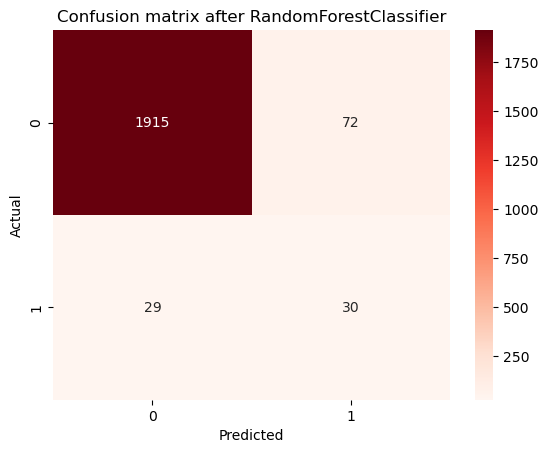

In [17]:
#Confusion matrice
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Reds")
plt.title("Confusion matrix after RandomForestClassifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

[0.         0.03623553 1.        ] [0.         0.50847458 1.        ]
73.61195226600019


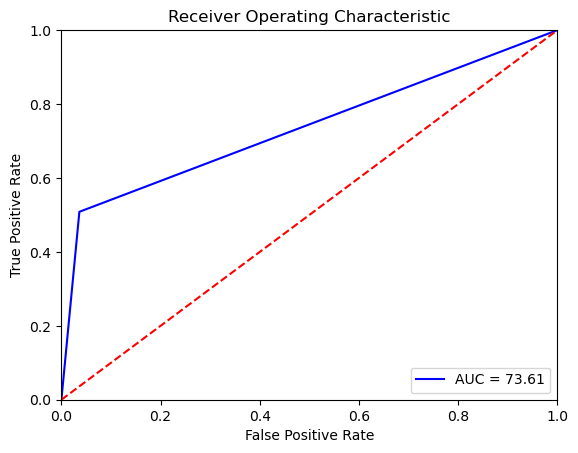

In [18]:
## roc curve ##

fp, tp, thresholds=roc_curve(y_test,y_pred,pos_label=1)
print(fp, tp)
AUC=auc(fp, tp)*100
print(AUC)

#tracer tp en fonction de fp
plt.plot(fp, tp, color='blue',label = 'AUC = %0.2f' % AUC)
plt.title('Receiver Operating Characteristic')

#plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUC)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### NEW ! Amélioration du modèle (Tuning)

In [19]:
# Create a new pipeline
model_forest = imbpipeline([
    ("balancing", SMOTE(random_state=1)),
    ("scaling", RobustScaler()),
    ("classifier", RandomForestClassifier())
])

model_forest

Pipeline(steps=[('balancing', SMOTE(random_state=1)),
                ('scaling', RobustScaler()),
                ('classifier', RandomForestClassifier())])

In [20]:
for param in model_forest.get_params().keys():
    print(param)

memory
steps
verbose
balancing
scaling
classifier
balancing__k_neighbors
balancing__n_jobs
balancing__random_state
balancing__sampling_strategy
scaling__copy
scaling__quantile_range
scaling__unit_variance
scaling__with_centering
scaling__with_scaling
classifier__bootstrap
classifier__ccp_alpha
classifier__class_weight
classifier__criterion
classifier__max_depth
classifier__max_features
classifier__max_leaf_nodes
classifier__max_samples
classifier__min_impurity_decrease
classifier__min_samples_leaf
classifier__min_samples_split
classifier__min_weight_fraction_leaf
classifier__n_estimators
classifier__n_jobs
classifier__oob_score
classifier__random_state
classifier__verbose
classifier__warm_start


In [21]:
param_grid = {
    'classifier__n_estimators' : [200, 400],
    'classifier__random_state' : [100, 200],
    'classifier__max_features': ['auto', 'sqrt'],
    'classifier__bootstrap' : [True, False],
    'classifier__max_depth' : [10, 20, None]
}

In [22]:
#search best param for model
clf = GridSearchCV(estimator= model_forest,
                   param_grid= param_grid,
                   scoring ='recall',
                   return_train_score=True,
                   verbose=3)

clf.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END classifier__bootstrap=True, classifier__max_depth=10, classifier__max_features=auto, classifier__n_estimators=200, classifier__random_state=100;, score=(train=1.000, test=0.719) total time=   2.9s
[CV 2/5] END classifier__bootstrap=True, classifier__max_depth=10, classifier__max_features=auto, classifier__n_estimators=200, classifier__random_state=100;, score=(train=1.000, test=0.688) total time=   2.9s
[CV 3/5] END classifier__bootstrap=True, classifier__max_depth=10, classifier__max_features=auto, classifier__n_estimators=200, classifier__random_state=100;, score=(train=1.000, test=0.545) total time=   2.8s
[CV 4/5] END classifier__bootstrap=True, classifier__max_depth=10, classifier__max_features=auto, classifier__n_estimators=200, classifier__random_state=100;, score=(train=1.000, test=0.656) total time=   3.1s
[CV 5/5] END classifier__bootstrap=True, classifier__max_depth=10, classifier__max_features=auto, 

[CV 5/5] END classifier__bootstrap=True, classifier__max_depth=10, classifier__max_features=sqrt, classifier__n_estimators=400, classifier__random_state=200;, score=(train=0.992, test=0.656) total time=   6.0s
[CV 1/5] END classifier__bootstrap=True, classifier__max_depth=20, classifier__max_features=auto, classifier__n_estimators=200, classifier__random_state=100;, score=(train=1.000, test=0.625) total time=   3.7s
[CV 2/5] END classifier__bootstrap=True, classifier__max_depth=20, classifier__max_features=auto, classifier__n_estimators=200, classifier__random_state=100;, score=(train=1.000, test=0.500) total time=   3.7s
[CV 3/5] END classifier__bootstrap=True, classifier__max_depth=20, classifier__max_features=auto, classifier__n_estimators=200, classifier__random_state=100;, score=(train=1.000, test=0.273) total time=   3.6s
[CV 4/5] END classifier__bootstrap=True, classifier__max_depth=20, classifier__max_features=auto, classifier__n_estimators=200, classifier__random_state=100;, s

[CV 5/5] END classifier__bootstrap=True, classifier__max_depth=20, classifier__max_features=sqrt, classifier__n_estimators=400, classifier__random_state=200;, score=(train=1.000, test=0.469) total time=   9.2s
[CV 1/5] END classifier__bootstrap=True, classifier__max_depth=None, classifier__max_features=auto, classifier__n_estimators=200, classifier__random_state=100;, score=(train=1.000, test=0.625) total time=   3.5s
[CV 2/5] END classifier__bootstrap=True, classifier__max_depth=None, classifier__max_features=auto, classifier__n_estimators=200, classifier__random_state=100;, score=(train=1.000, test=0.469) total time=   4.4s
[CV 3/5] END classifier__bootstrap=True, classifier__max_depth=None, classifier__max_features=auto, classifier__n_estimators=200, classifier__random_state=100;, score=(train=1.000, test=0.242) total time=   3.7s
[CV 4/5] END classifier__bootstrap=True, classifier__max_depth=None, classifier__max_features=auto, classifier__n_estimators=200, classifier__random_state

[CV 4/5] END classifier__bootstrap=True, classifier__max_depth=None, classifier__max_features=sqrt, classifier__n_estimators=400, classifier__random_state=200;, score=(train=1.000, test=0.469) total time=   8.0s
[CV 5/5] END classifier__bootstrap=True, classifier__max_depth=None, classifier__max_features=sqrt, classifier__n_estimators=400, classifier__random_state=200;, score=(train=1.000, test=0.469) total time=   7.6s
[CV 1/5] END classifier__bootstrap=False, classifier__max_depth=10, classifier__max_features=auto, classifier__n_estimators=200, classifier__random_state=100;, score=(train=1.000, test=0.594) total time=   4.9s
[CV 2/5] END classifier__bootstrap=False, classifier__max_depth=10, classifier__max_features=auto, classifier__n_estimators=200, classifier__random_state=100;, score=(train=1.000, test=0.656) total time=   5.4s
[CV 3/5] END classifier__bootstrap=False, classifier__max_depth=10, classifier__max_features=auto, classifier__n_estimators=200, classifier__random_state=

[CV 3/5] END classifier__bootstrap=False, classifier__max_depth=10, classifier__max_features=sqrt, classifier__n_estimators=400, classifier__random_state=200;, score=(train=1.000, test=0.485) total time=   9.6s
[CV 4/5] END classifier__bootstrap=False, classifier__max_depth=10, classifier__max_features=sqrt, classifier__n_estimators=400, classifier__random_state=200;, score=(train=1.000, test=0.594) total time=  11.8s
[CV 5/5] END classifier__bootstrap=False, classifier__max_depth=10, classifier__max_features=sqrt, classifier__n_estimators=400, classifier__random_state=200;, score=(train=1.000, test=0.656) total time=  11.9s
[CV 1/5] END classifier__bootstrap=False, classifier__max_depth=20, classifier__max_features=auto, classifier__n_estimators=200, classifier__random_state=100;, score=(train=1.000, test=0.531) total time=   7.1s
[CV 2/5] END classifier__bootstrap=False, classifier__max_depth=20, classifier__max_features=auto, classifier__n_estimators=200, classifier__random_state=10

[CV 2/5] END classifier__bootstrap=False, classifier__max_depth=20, classifier__max_features=sqrt, classifier__n_estimators=400, classifier__random_state=200;, score=(train=1.000, test=0.438) total time=  11.5s
[CV 3/5] END classifier__bootstrap=False, classifier__max_depth=20, classifier__max_features=sqrt, classifier__n_estimators=400, classifier__random_state=200;, score=(train=1.000, test=0.212) total time=  11.4s
[CV 4/5] END classifier__bootstrap=False, classifier__max_depth=20, classifier__max_features=sqrt, classifier__n_estimators=400, classifier__random_state=200;, score=(train=1.000, test=0.344) total time=  11.2s
[CV 5/5] END classifier__bootstrap=False, classifier__max_depth=20, classifier__max_features=sqrt, classifier__n_estimators=400, classifier__random_state=200;, score=(train=1.000, test=0.406) total time=  11.2s
[CV 1/5] END classifier__bootstrap=False, classifier__max_depth=None, classifier__max_features=auto, classifier__n_estimators=200, classifier__random_state=

[CV 1/5] END classifier__bootstrap=False, classifier__max_depth=None, classifier__max_features=sqrt, classifier__n_estimators=400, classifier__random_state=200;, score=(train=1.000, test=0.562) total time=  11.6s
[CV 2/5] END classifier__bootstrap=False, classifier__max_depth=None, classifier__max_features=sqrt, classifier__n_estimators=400, classifier__random_state=200;, score=(train=1.000, test=0.375) total time=  11.8s
[CV 3/5] END classifier__bootstrap=False, classifier__max_depth=None, classifier__max_features=sqrt, classifier__n_estimators=400, classifier__random_state=200;, score=(train=1.000, test=0.182) total time=  11.1s
[CV 4/5] END classifier__bootstrap=False, classifier__max_depth=None, classifier__max_features=sqrt, classifier__n_estimators=400, classifier__random_state=200;, score=(train=1.000, test=0.375) total time=  11.4s
[CV 5/5] END classifier__bootstrap=False, classifier__max_depth=None, classifier__max_features=sqrt, classifier__n_estimators=400, classifier__rando

GridSearchCV(estimator=Pipeline(steps=[('balancing', SMOTE(random_state=1)),
                                       ('scaling', RobustScaler()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__bootstrap': [True, False],
                         'classifier__max_depth': [10, 20, None],
                         'classifier__max_features': ['auto', 'sqrt'],
                         'classifier__n_estimators': [200, 400],
                         'classifier__random_state': [100, 200]},
             return_train_score=True, scoring='recall', verbose=3)

In [23]:
best_estim= clf.best_estimator_
print(best_estim)

Pipeline(steps=[('balancing', SMOTE(random_state=1)),
                ('scaling', RobustScaler()),
                ('classifier',
                 RandomForestClassifier(max_depth=10, n_estimators=400,
                                        random_state=100))])


In [24]:
## Save new model in Pickle ##

with open("model_forest_final.pkl", "wb") as file:
    pickle.dump(best_estim, file)

In [25]:
## Import pickle ##

with open('model_forest_final.pkl', 'rb') as file:
    pipe_model_final = pickle.load(file)

In [26]:
pipe_model_final

Pipeline(steps=[('balancing', SMOTE(random_state=1)),
                ('scaling', RobustScaler()),
                ('classifier',
                 RandomForestClassifier(max_depth=10, n_estimators=400,
                                        random_state=100))])

### After GridSearchCV, I put new model with best hyperparameters

In [28]:
# Define the target and split data for train_test
y_2= data_full['Bankrupt?_x']
X_2= data_full.drop('Bankrupt?_x', axis=1)

X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2,
                                                    test_size= 0.3,
                                                    random_state=0)

In [29]:
## fit model ##
train_pipe_model_final = pipe_model_final.fit(X_2_train, y_2_train)

In [30]:
train_pipe_model_final

Pipeline(steps=[('balancing', SMOTE(random_state=1)),
                ('scaling', RobustScaler()),
                ('classifier',
                 RandomForestClassifier(max_depth=10, n_estimators=400,
                                        random_state=100))])

In [31]:
## See results ##
y_2_pred = train_pipe_model_final.predict(X_2_test)
y_2_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
#Look the prediction
prediction_df_2 = pd.DataFrame()
prediction_df_2['Real_Value'] = y_2_test
prediction_df_2['Prediction_Value'] = y_2_pred
prediction_df_2

,Real_Value,Prediction_Value
4929,0,0
6424,0,0
3807,0,0
2011,0,0
6728,1,0
...,...,...
5809,0,0
5961,0,0
4623,0,0
4783,0,0


In [33]:
print(classification_report(y_2_test, y_2_pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1987
           1       0.20      0.61      0.30        59

    accuracy                           0.92      2046
   macro avg       0.59      0.77      0.63      2046
weighted avg       0.96      0.92      0.94      2046



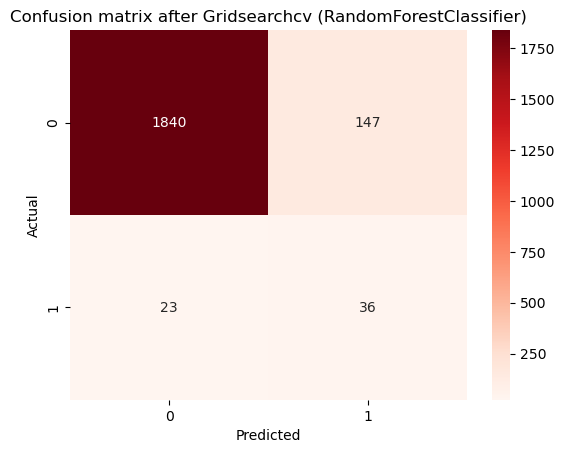

In [35]:
#Confusion matrice
conf_mat_2 = confusion_matrix(y_2_test, y_2_pred)
sns.heatmap(conf_mat_2, annot=True, fmt="d", cmap="Reds")
plt.title("Confusion matrix after Gridsearchcv (RandomForestClassifier)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

[0.         0.07398088 1.        ] [0.         0.61016949 1.        ]
76.80943079167129


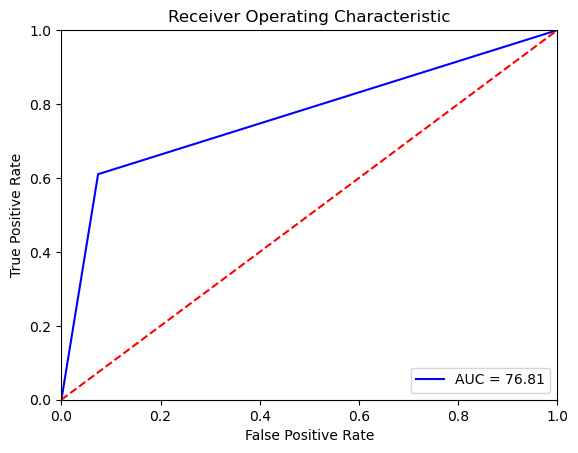

In [36]:
## roc curve ##

fp, tp, thresholds=roc_curve(y_2_test,y_2_pred,pos_label=1)
print(fp, tp)
AUC=auc(fp, tp)*100
print(AUC)

#tracer tp en fonction de fp
plt.plot(fp, tp, color='blue',label = 'AUC = %0.2f' % AUC)
plt.title('Receiver Operating Characteristic')

#plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUC)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [37]:
## Save RandomForest with best hyperparameters in Pickle ##

with open("True_model_RandomForest.pkl", "wb") as file:
    pickle.dump(train_pipe_model_final, file)

## Implementation of unit tests exemple

In [38]:
def test_df_out(df):
    if len(df.columns) == 13:
        return True
    else:
        return False

In [39]:
test_df_out(df)

False

In [40]:
test_df_out(data_full)

True